In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from train_mlp_numpy import train as train_numpy
from pytorch_train_mlp import train as train_pytorch
from modules import SoftMax

def get_dataset(name, n_samples=1000):
    if name == 'Moons':
        X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
    elif name == 'Circles':
        X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.4, random_state=42)
    elif name == 'Blobs':
        X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.5, random_state=42)
    else:
        raise ValueError("Unknown dataset")
    
    enc = OneHotEncoder(sparse_output=False)
    y_onehot = enc.fit_transform(y.reshape(-1, 1))
    return X, y, y_onehot

def plot_decision_boundary(ax, model, X, y, title, framework='numpy'):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    if framework == 'numpy':
        logits = model.forward(grid_points)
        probs = SoftMax().forward(logits)
        Z = np.argmax(probs, axis=1)
    else: 
        model.eval()
        with torch.no_grad():
            inputs_t = torch.from_numpy(grid_points).float()
            logits = model(inputs_t)
            _, Z = torch.max(logits, 1)
            Z = Z.numpy()
            
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.Spectral)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

Starting independent experiments on 3 datasets...


==================== Processing Dataset: Moons ====================
  Training NumPy Model...
Mini-batch gradient descent with batch size 64
Epoch: 0, Test Loss: 0.6898, Test Accuracy: 0.5000, Train Accuracy: 0.5000
Epoch: 10, Test Loss: 0.4109, Test Accuracy: 0.8200, Train Accuracy: 0.8375
Epoch: 20, Test Loss: 0.2474, Test Accuracy: 0.8800, Train Accuracy: 0.8825
Epoch: 30, Test Loss: 0.2377, Test Accuracy: 0.9000, Train Accuracy: 0.8888
Epoch: 40, Test Loss: 0.2278, Test Accuracy: 0.8950, Train Accuracy: 0.8950
Epoch: 50, Test Loss: 0.2195, Test Accuracy: 0.9000, Train Accuracy: 0.8988
Epoch: 60, Test Loss: 0.2199, Test Accuracy: 0.8850, Train Accuracy: 0.9012
Epoch: 70, Test Loss: 0.2192, Test Accuracy: 0.8850, Train Accuracy: 0.9025
Epoch: 80, Test Loss: 0.2180, Test Accuracy: 0.8850, Train Accuracy: 0.9012
Epoch: 90, Test Loss: 0.2176, Test Accuracy: 0.8850, Train Accuracy: 0.9000
Epoch: 100, Test Loss: 0.2220, Test Accuracy: 0.

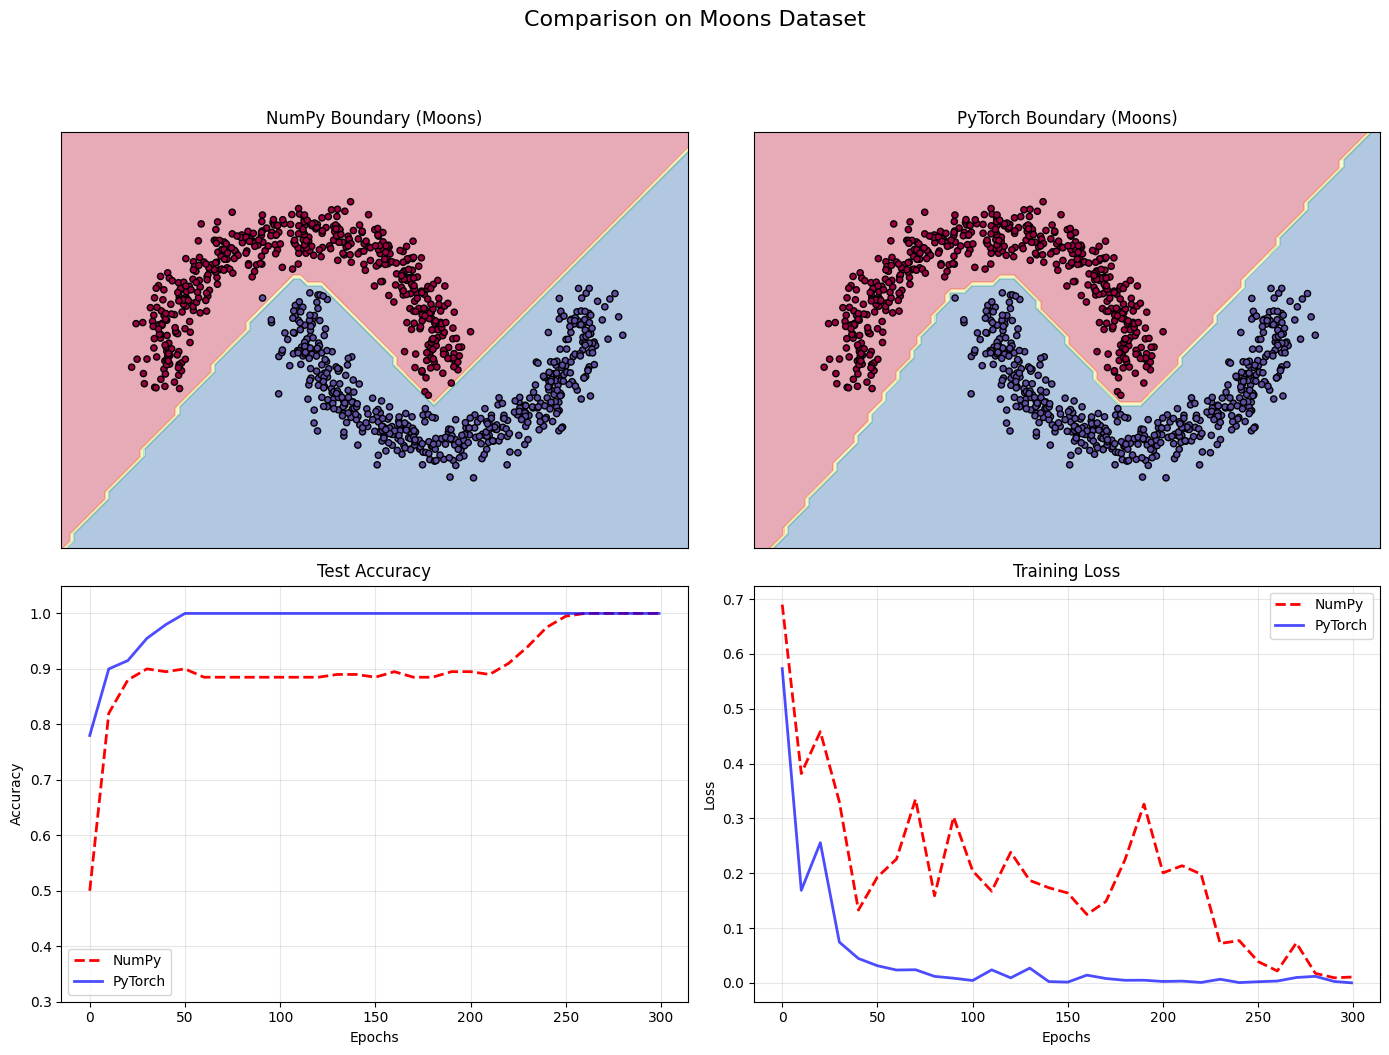


==================== Processing Dataset: Circles ====================
  Training NumPy Model...
Mini-batch gradient descent with batch size 64
Epoch: 0, Test Loss: 0.6919, Test Accuracy: 0.6350, Train Accuracy: 0.6200
Epoch: 10, Test Loss: 0.6778, Test Accuracy: 0.9300, Train Accuracy: 0.9762
Epoch: 20, Test Loss: 0.5866, Test Accuracy: 0.9350, Train Accuracy: 0.9625
Epoch: 30, Test Loss: 0.2065, Test Accuracy: 0.9950, Train Accuracy: 1.0000
Epoch: 40, Test Loss: 0.0814, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 50, Test Loss: 0.0518, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 60, Test Loss: 0.0393, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 70, Test Loss: 0.0325, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 80, Test Loss: 0.0281, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 90, Test Loss: 0.0252, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 100, Test Loss: 0.0230, Test Accuracy: 1.0000, Train Accuracy: 1.0000
Epoch: 110, Test Los

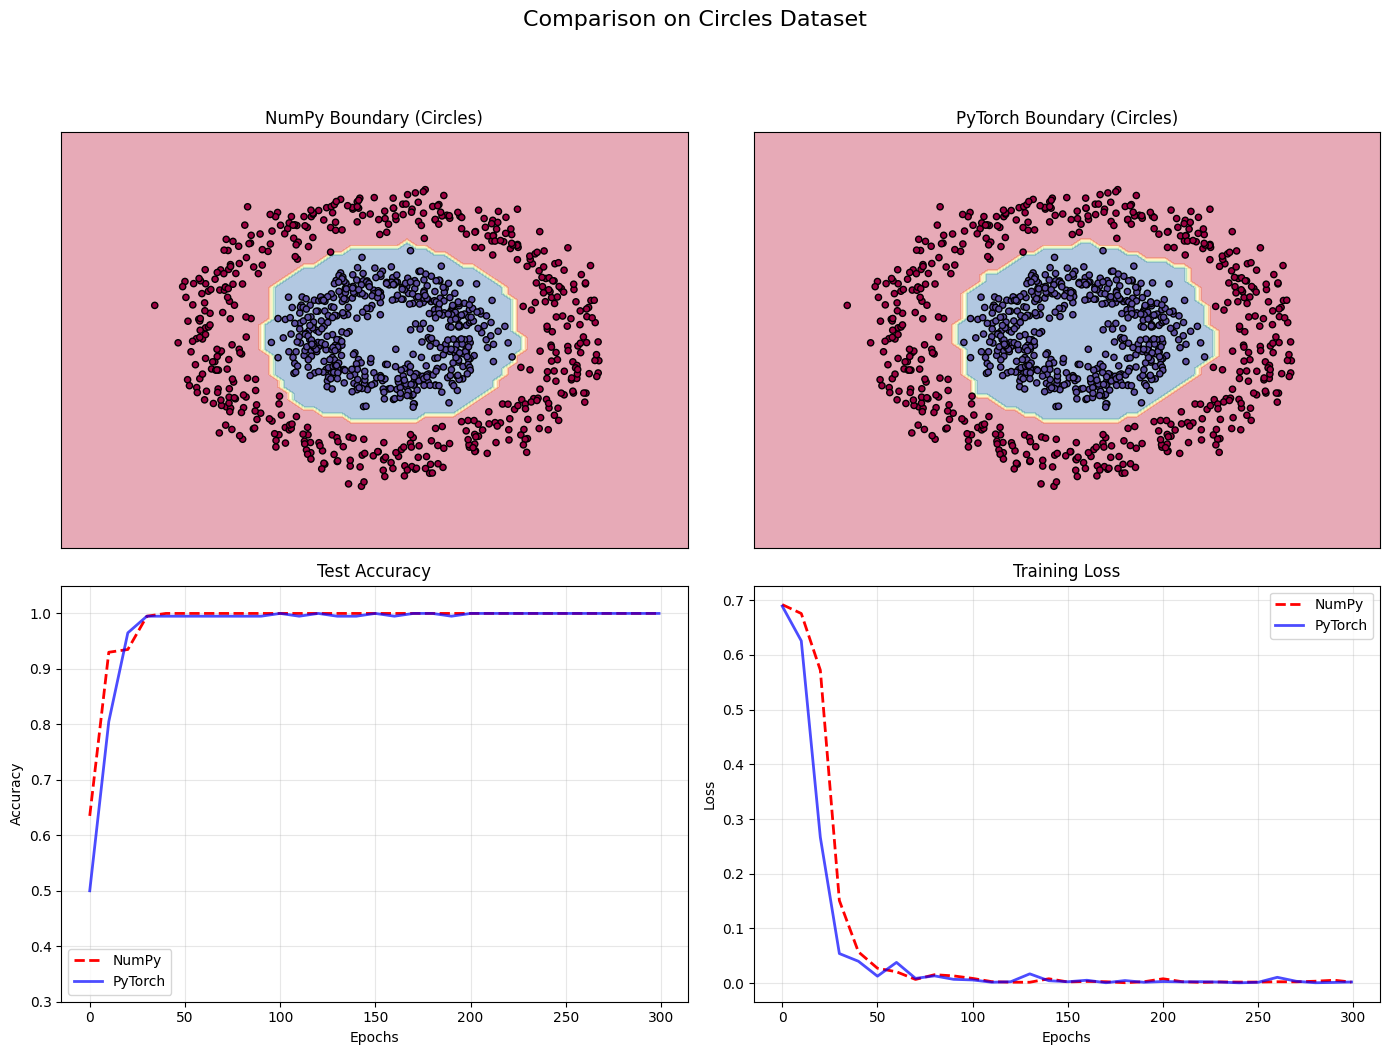


==================== Processing Dataset: Blobs ====================
  Training NumPy Model...
Mini-batch gradient descent with batch size 64
Epoch: 0, Test Loss: 0.8736, Test Accuracy: 0.9900, Train Accuracy: 0.9975
Epoch: 10, Test Loss: 0.0036, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 20, Test Loss: 0.0020, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 30, Test Loss: 0.0016, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 40, Test Loss: 0.0013, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 50, Test Loss: 0.0010, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 60, Test Loss: 0.0009, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 70, Test Loss: 0.0008, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 80, Test Loss: 0.0008, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 90, Test Loss: 0.0007, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 100, Test Loss: 0.0006, Test Accuracy: 1.0000, Train Accuracy: 0.9988
Epoch: 110, Test Loss:

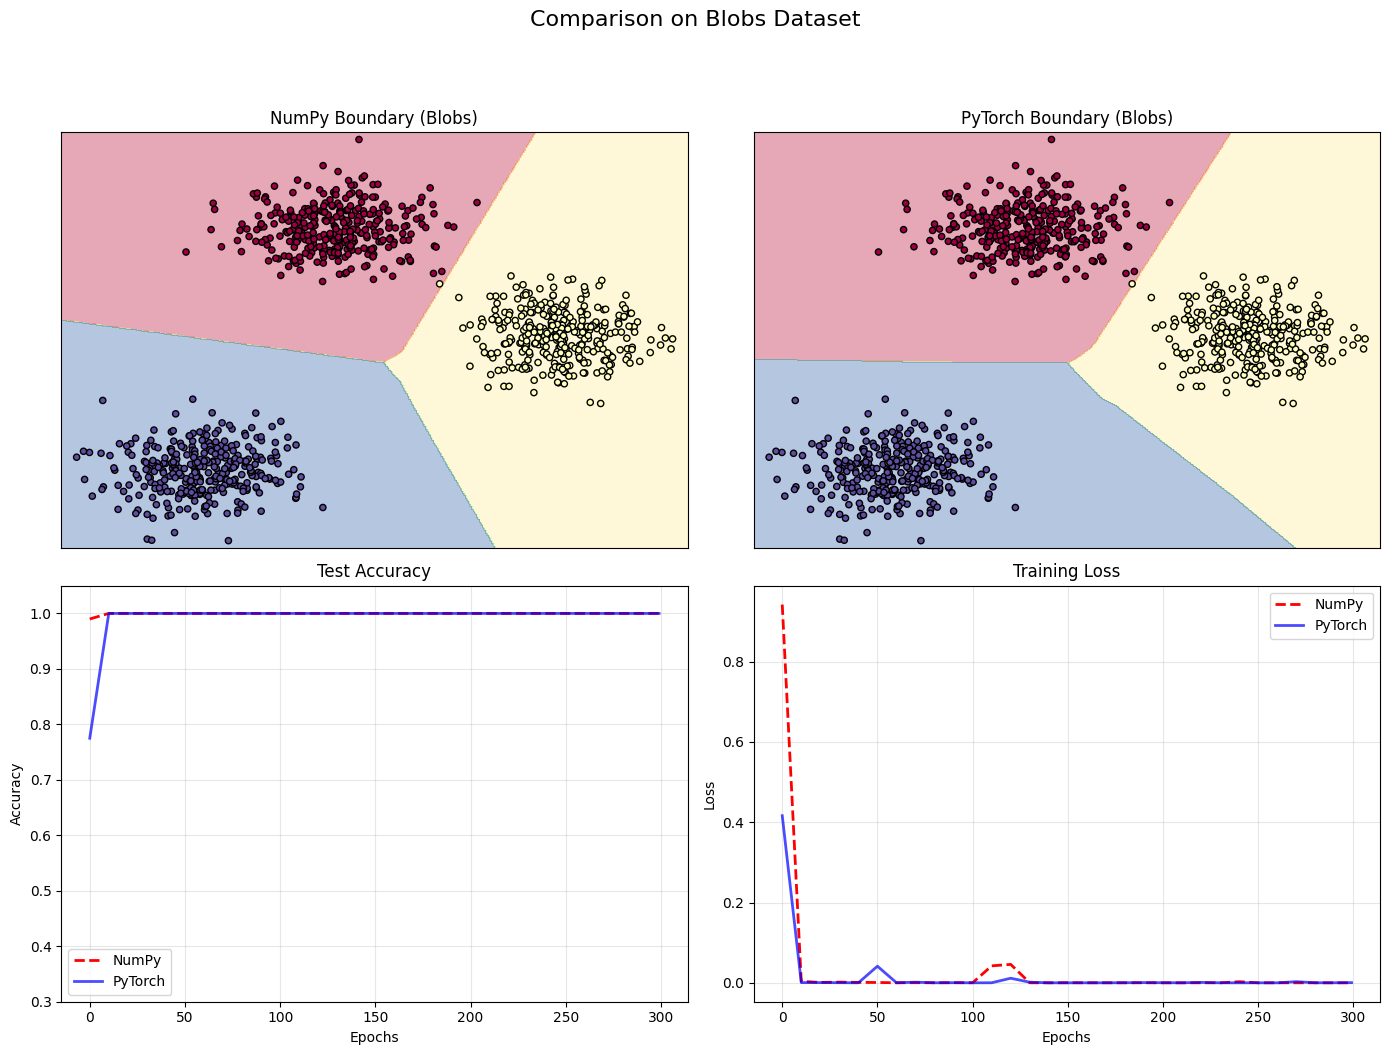

In [ ]:
datasets_list = ['Moons', 'Circles', 'Blobs']
DNN_HIDDEN = '20,20'
LR = 0.01
EPOCHS = 300
EVAL_FREQ = 10
BATCH_SIZE = 64

print(f"Starting independent experiments on {len(datasets_list)} datasets...\n")

for ds_name in datasets_list:
    print(f"\n{'='*20} Processing Dataset: {ds_name} {'='*20}")
    
    X, y_scalar, y_onehot = get_dataset(ds_name)
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
    data_tuple = (X_train, y_train, X_test, y_test)
    
    print(f"  Training NumPy Model...")
    np_steps, np_train_acc, np_test_acc, np_loss, np_model = train_numpy(
        data=data_tuple,
        dnn_hidden_units=DNN_HIDDEN,
        learning_rate=LR,
        max_steps=EPOCHS,
        eval_freq=EVAL_FREQ,
        batch_size=BATCH_SIZE,
        momentum=0.9,
        leaky=False
    )
    
    print(f"  Training PyTorch Model...")
    torch_steps, torch_train_acc, torch_test_acc, torch_loss, torch_model = train_pytorch(
        data=data_tuple,
        dnn_hidden_units=DNN_HIDDEN,
        learning_rate=LR,
        max_steps=EPOCHS,
        eval_freq=EVAL_FREQ,
        batch_size=BATCH_SIZE
    )
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.suptitle(f"Comparison on {ds_name} Dataset", fontsize=16, y=1.05)
    
    # [图 1] NumPy 决策边界
    plot_decision_boundary(axes[0, 0], np_model, X, y_scalar, f"NumPy Boundary ({ds_name})", 'numpy')
    
    # [图 2] PyTorch 决策边界
    plot_decision_boundary(axes[0, 1], torch_model, X, y_scalar, f"PyTorch Boundary ({ds_name})", 'pytorch')
    
    # [图 3] 准确率曲线对比
    axes[1, 0].plot(np_steps, np_test_acc, 'r--', label='NumPy', linewidth=2)
    axes[1, 0].plot(torch_steps, torch_test_acc, 'b-', label='PyTorch', linewidth=2, alpha=0.7)
    axes[1, 0].set_title("Test Accuracy")
    axes[1, 0].set_xlabel("Epochs")
    axes[1, 0].set_ylabel("Accuracy")
    axes[1, 0].set_ylim(0.3, 1.05)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # [图 4] Loss 曲线对比
    axes[1, 1].plot(np_steps, np_loss, 'r--', label='NumPy', linewidth=2)
    axes[1, 1].plot(torch_steps, torch_loss, 'b-', label='PyTorch', linewidth=2, alpha=0.7)
    axes[1, 1].set_title("Training Loss")
    axes[1, 1].set_xlabel("Epochs")
    axes[1, 1].set_ylabel("Loss")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()